In [146]:
import numpy as np
import warnings
import copy
import os
import pandas as pd
warnings.filterwarnings("ignore")
import sys
sys.path.append('../induction_motor_anomaly_detection/')
import modules,scaler
import matplotlib.pyplot as plt

In [4]:
normal_data = pd.read_csv('../data/combined_data.csv')


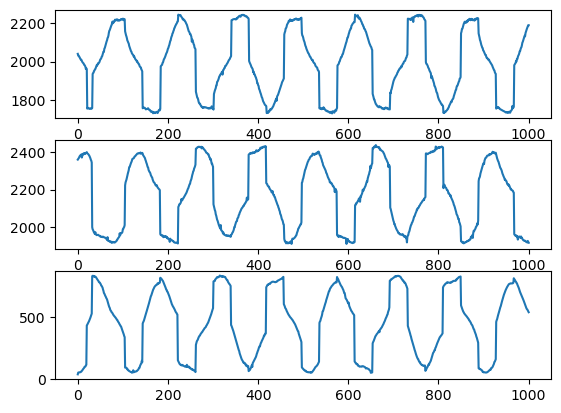

In [5]:
plt.subplot(3, 1, 1)
plt.plot(normal_data['current_1'].loc[0:1000])
plt.subplot(3, 1, 2)
plt.plot(normal_data['current_2'].loc[0:1000])
plt.subplot(3, 1, 3)
plt.plot(normal_data['current_3'].loc[0:1000])

In [8]:
normal_data.shape[0]

3170000

In [9]:
def add_anomalies_amplitude( dataframe, number_of_anomalies=0, data_length=0):
    """
    Adds anomalies to the given DataFrame and returns a new DataFrame with added noise.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        The DataFrame to which anomalies should be added.

    number_of_anomalies : int (default: 0)
        The number of anomalies to add. If 0, it adds anomalies to the entire DataFrame.

    data_length : int (default: 0)
        The length of data to which anomalies should be added. If 0, it adds anomalies to the entire DataFrame.

    Returns:
    --------
    pandas.DataFrame
        A new DataFrame with added noise, representing the anomalous data.
    """
    

    # Determine the upper bound of the data to which anomalies should be added.
    upper_bound = number_of_anomalies if number_of_anomalies else dataframe.shape[0]
    
    # Determine the length of the data to which anomalies should be added.
    length = data_length if data_length else dataframe.shape[0]

    # Make a deep copy of the data up to the upper bound and length.
    df = copy.deepcopy(dataframe[0:length])
    noise_df = df.iloc[:upper_bound,:]

    # Calculate the noise amplitude based on the signal amplitude.
    noise_amplitude = 0.1 * np.max(np.abs(df))

    # Add noise to the signal using amplitude scaling.
    noise = np.random.normal(0, noise_amplitude, noise_df.shape)
    
    df.iloc[:upper_bound,:] += noise

    return df

In [10]:
amp_noise = add_anomalies_amplitude(normal_data,1000, 10000)

In [11]:
amp_noise.shape

(10000, 3)

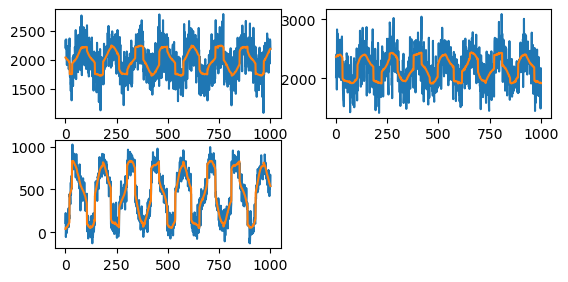

In [13]:
plt.subplot(3, 2, 1)
plt.plot(amp_noise['current_1'].loc[0:1000])
plt.subplot(3, 2, 2)
plt.plot(amp_noise['current_2'].loc[0:1000])
plt.subplot(3, 2, 3)
plt.plot(amp_noise['current_3'].loc[0:1000])
plt.subplot(3, 2, 1)
plt.plot(normal_data['current_1'].loc[0:1000])
plt.subplot(3, 2, 2)
plt.plot(normal_data['current_2'].loc[0:1000])
plt.subplot(3, 2, 3)
plt.plot(normal_data['current_3'].loc[0:1000])

In [14]:
def add_noise_awgn(signal):
        # For electric signals, one way to add noise while preserving the signal 
        # characteristics is by using a technique called additive white Gaussian noise (AWGN). 
        # This technique adds random Gaussian noise to the signal while preserving the 
        # frequency characteristics of the signal.
        # Calculate the power of the signal
        signal_power = np.var(signal)

        # Set the desired SNR in dB
        snr_db = 10

        # Calculate the noise power based on the desired SNR and the signal power
        noise_power = signal_power / (10 ** (snr_db / 10))

        # Generate random Gaussian noise with zero mean and the calculated noise power
        noise = np.random.normal(0, np.sqrt(noise_power), size=signal.shape)

        # Add the noise to the signal
        noisy_signal = signal + noise
        return noisy_signal

In [17]:
awgn_noise = add_noise_awgn(normal_data[0:10000])

In [18]:
awgn_noise.shape

(10000, 3)

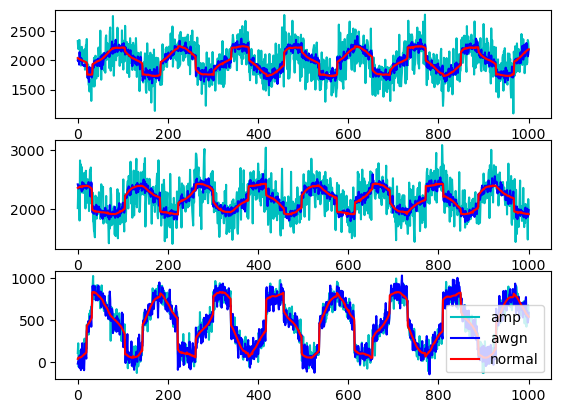

In [30]:
plt.subplot(3, 1, 1)
plt.plot(amp_noise['current_1'].loc[0:1000],'c',label='amp')
plt.subplot(3, 1, 2)
plt.plot(amp_noise['current_2'].loc[0:1000],'c',label='amp')
plt.subplot(3, 1, 3)
plt.plot(amp_noise['current_3'].loc[0:1000],'c',label='amp')
plt.subplot(3, 1, 1)
plt.plot(awgn_noise['current_1'].loc[0:1000],'b',label='awgn')
plt.subplot(3, 1, 2)
plt.plot(awgn_noise['current_2'].loc[0:1000],'b',label='awgn')
plt.subplot(3, 1, 3)
plt.plot(awgn_noise['current_3'].loc[0:1000],'b',label='awgn')
plt.subplot(3, 1, 1)
plt.plot(normal_data['current_1'].loc[0:1000],'r',label='normal')
plt.subplot(3, 1, 2)
plt.plot(normal_data['current_2'].loc[0:1000],'r',label='normal')
plt.subplot(3, 1, 3)
plt.plot(normal_data['current_3'].loc[0:1000],'r',label='normal')
plt.legend()

In [31]:
import numpy as np

def add_noise_gaussian(data, level):
    """
    Adds Gaussian noise to the data.
    
    Parameters:
    data: numpy array
        The data to which noise is to be added.
    level: float
        The standard deviation of the Gaussian noise.
        
    Returns:
    noisy_data: numpy array
        The data with added noise.
    """
    noise = np.random.normal(0, level, size=data.shape)
    noisy_data = data + noise
    
    return noisy_data


In [40]:
gau = add_noise_gaussian(normal_data[0:10000],10)

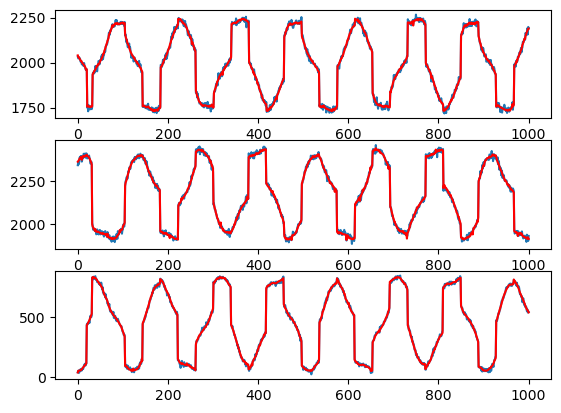

In [41]:
plt.subplot(3, 1, 1)
plt.plot(gau['current_1'].loc[0:1000])
plt.subplot(3, 1, 2)
plt.plot(gau['current_2'].loc[0:1000])
plt.subplot(3, 1, 3)
plt.plot(gau['current_3'].loc[0:1000])
plt.subplot(3, 1, 1)
plt.plot(normal_data['current_1'].loc[0:1000],'r',label='normal')
plt.subplot(3, 1, 2)
plt.plot(normal_data['current_2'].loc[0:1000],'r',label='normal')
plt.subplot(3, 1, 3)
plt.plot(normal_data['current_3'].loc[0:1000],'r',label='normal')

Introducing anomalies

In [99]:


def introduce_spikes(df, magnitude=5, probability=0.01):
    # Add spikes to the data by randomly selecting some time points
    # and adding a sudden spike of a certain magnitude to the corresponding current value
    mask = np.random.choice([0, 1], size=df.shape, p=[1-probability, probability])
    spikes = np.random.normal(loc=0, scale=magnitude, size=df.shape) * mask
    df_spikes = df + spikes
    return df_spikes

def introduce_dropouts(df, probability=0.01):
    # Introduce dropouts by randomly removing certain samples from the data
    # by setting the corresponding current values to zero
    mask = np.random.choice([0, 1], size=df.shape, p=[probability,1-probability])
    df_dropouts = df * mask
    return df_dropouts

def introduce_drifts(df, amplitude=2, frequency=0.01):
    # Introduce drifts by gradually changing the current values over time
    # by adding a sinusoidal or polynomial trend to the data
    t = np.arange(df.shape[0])
    drifts = amplitude * np.sin(2 * np.pi * frequency * t)
    df_drifts = df + drifts[:, np.newaxis]
    return df_drifts

def introduce_transients(df, magnitude=10, duration=10):
    # Introduce transients by adding short-duration, high-amplitude disturbances
    # to the data, which can represent sudden changes in the system conditions or external interferences
    t = np.arange(df.shape[0])
    transients = np.zeros(df.shape)
    start_idx = np.random.randint(low=0, high=df.shape[0]-duration)
    end_idx = start_idx + duration
    transients[start_idx:end_idx] = magnitude
    df_transients = df + transients
    return df_transients


In [79]:
df = copy.deepcopy(normal_data[0:10000])

In [104]:
# Introduce dropouts
df_dropouts = introduce_dropouts(df, probability=0.01)


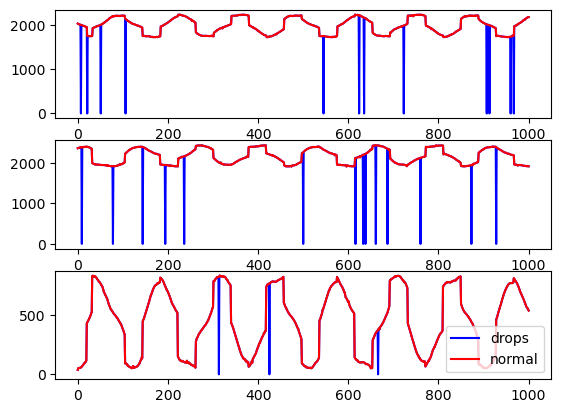

In [106]:
plt.subplot(3, 1, 1)
plt.plot(df_dropouts['current_1'].loc[0:1000],'b',label='drops')
plt.subplot(3, 1, 2)
plt.plot(df_dropouts['current_2'].loc[0:1000],'b',label='drops')
plt.subplot(3, 1, 3)
plt.plot(df_dropouts['current_3'].loc[0:1000],'b',label='drops')
plt.subplot(3, 1, 1)
plt.plot(normal_data['current_1'].loc[0:1000],'r',label='normal')
plt.subplot(3, 1, 2)
plt.plot(normal_data['current_2'].loc[0:1000],'r',label='normal')
plt.subplot(3, 1, 3)
plt.plot(normal_data['current_3'].loc[0:1000],'r',label='normal')
plt.legend()

In [115]:
df_spikes = introduce_spikes(df, magnitude=50, probability=0.1)

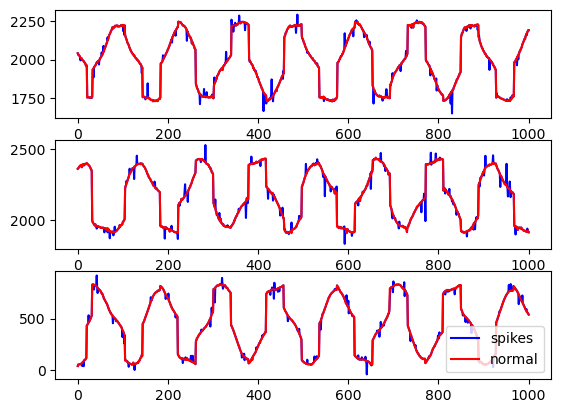

In [116]:
plt.subplot(3, 1, 1)
plt.plot(df_spikes['current_1'].loc[0:1000],'b',label='spikes')
plt.subplot(3, 1, 2)
plt.plot(df_spikes['current_2'].loc[0:1000],'b',label='spikes')
plt.subplot(3, 1, 3)
plt.plot(df_spikes['current_3'].loc[0:1000],'b',label='spikes')
plt.subplot(3, 1, 1)
plt.plot(normal_data['current_1'].loc[0:1000],'r',label='normal')
plt.subplot(3, 1, 2)
plt.plot(normal_data['current_2'].loc[0:1000],'r',label='normal')
plt.subplot(3, 1, 3)
plt.plot(normal_data['current_3'].loc[0:1000],'r',label='normal')
plt.legend()

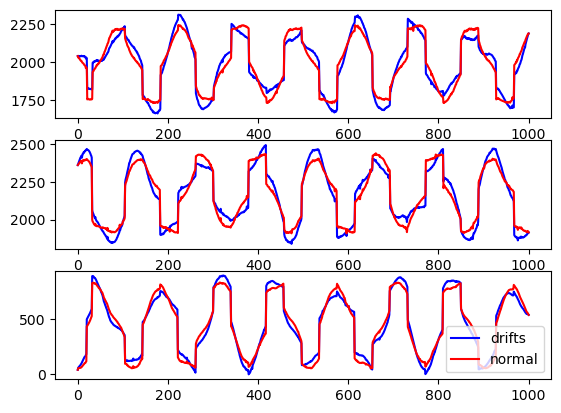

In [129]:
# Introduce drifts
df_drifts = introduce_drifts(df, amplitude=70, frequency=0.01)
plt.subplot(3, 1, 1)
plt.plot(df_drifts['current_1'].loc[0:1000],'b',label='drifts')
plt.subplot(3, 1, 2)
plt.plot(df_drifts['current_2'].loc[0:1000],'b',label='drifts')
plt.subplot(3, 1, 3)
plt.plot(df_drifts['current_3'].loc[0:1000],'b',label='drifts')
plt.subplot(3, 1, 1)
plt.plot(normal_data['current_1'].loc[0:1000],'r',label='normal')
plt.subplot(3, 1, 2)
plt.plot(normal_data['current_2'].loc[0:1000],'r',label='normal')
plt.subplot(3, 1, 3)
plt.plot(normal_data['current_3'].loc[0:1000],'r',label='normal')
plt.legend()

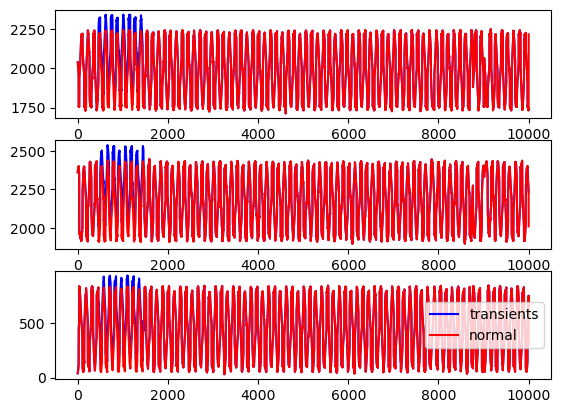

In [145]:
# Introduce transients
df_transients = introduce_transients(df, magnitude=100, duration=1000)
plt.subplot(3, 1, 1)
plt.plot(df_transients['current_1'].loc[0:10000],'b',label='transients')
plt.subplot(3, 1, 2)
plt.plot(df_transients['current_2'].loc[0:10000],'b',label='transients')
plt.subplot(3, 1, 3)
plt.plot(df_transients['current_3'].loc[0:10000],'b',label='transients')
plt.subplot(3, 1, 1)
plt.plot(normal_data['current_1'].loc[0:10000],'r',label='normal')
plt.subplot(3, 1, 2)
plt.plot(normal_data['current_2'].loc[0:10000],'r',label='normal')
plt.subplot(3, 1, 3)
plt.plot(normal_data['current_3'].loc[0:10000],'r',label='normal')
plt.legend()


In [1]:
import pandas as pd
import sys
sys.path.append('../induction_motor_anomaly_detection/')
import modules,scaler
import matplotlib.pyplot as plt

In [2]:
normal_data = pd.read_csv('../data/combined_data.csv')


In [3]:
df_a = modules.AnomalyGenerator.add_anomalies(normal_data, spike_magnitude=50,spike_probability=0.02, dropout_probability=0.01, drift_amplitude=300, drift_frequency=0.01,transient_magnitude=1000, transient_duration=1000)

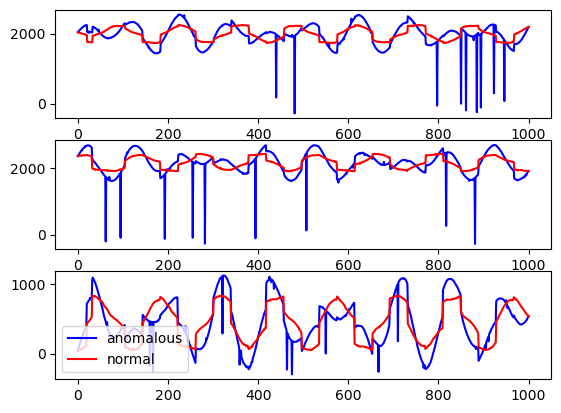

In [4]:
plt.subplot(3, 1, 1)
plt.plot(df_a['current_1'].loc[0:1000],'b',label='anomalous')
plt.subplot(3, 1, 2)
plt.plot(df_a['current_2'].loc[0:1000],'b',label='anomalous')
plt.subplot(3, 1, 3)
plt.plot(df_a['current_3'].loc[0:1000],'b',label='anomalous')
plt.subplot(3, 1, 1)
plt.plot(normal_data['current_1'].loc[0:1000],'r',label='normal')
plt.subplot(3, 1, 2)
plt.plot(normal_data['current_2'].loc[0:1000],'r',label='normal')
plt.subplot(3, 1, 3)
plt.plot(normal_data['current_3'].loc[0:1000],'r',label='normal')
plt.legend()

In [19]:
df_a.to_csv('../anomalous_data/combined_anomalous.csv', index=None)
